/Users/fareza_e/miniconda3/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO Measure of Sampling Adequacy: 0.8929326554900452
Bartlett's Test of Sphericity: Chi-Square = 4288.139611120068, p-value = 0.0
       Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
C1FA4  0.160775  0.337464  0.118176  0.825790  0.193606
C1FA3  0.127031  0.896843  0.141977  0.225045  0.182996
C1FA2  0.131723  0.378580  0.170890  0.186077  0.849641
C1FA8  0.324337  0.169181  0.855831  0.189268  0.032533
C1FA6  0.420635  0.171740  0.481172  0.233130  0.226094
C1FA1  0.820448  0.136337  0.308528  0.175861  0.146351
C1FA5  0.116058  0.310756  0.147566  0.892483  0.105507
C1FA7  0.795963  0.118198  0.275410  0.287113  0.045892
C1FA9  0.258869  0.171393  0.914772  0.125509  0.097897
C5N2   0.227403  0.164846  0.886656  0.066333  0.045068
C4E5   0.919420  0.144842  0.222173  0.116636  0.082823
C5N1   0.857980  0.135118  0.224197  0.075204  0.020698
C5N3   0.205693  0.175804  0.868023  0.059875  0.098772
C4E4   0.935573  0.087877  0.162735  0.041356  0.042984
C4E2   0.156293  0.284003  0.1

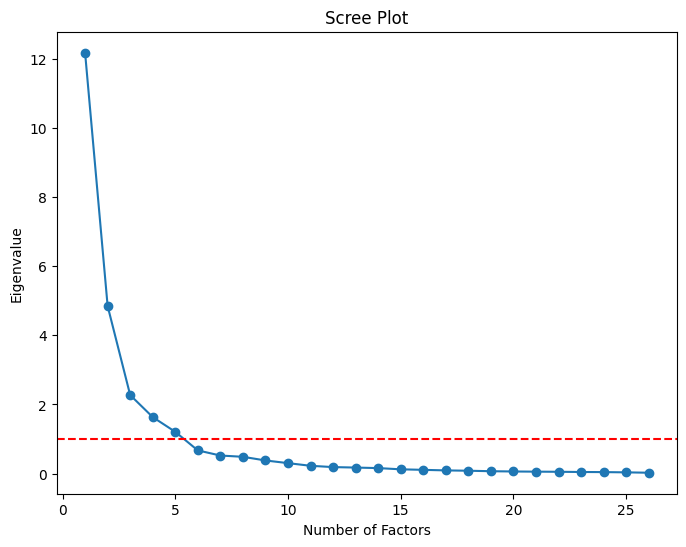

In [11]:
# ! pip install pandas matplotlib factor-analyzer
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data-120participants.csv")

# perform Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(df)
print(f"KMO Measure of Sampling Adequacy: {kmo_model}")

# perform Bartlett's Test of Sphericity
bartlett_chi_square, bartlett_p_value = calculate_bartlett_sphericity(df)
print(f"Bartlett's Test of Sphericity: Chi-Square = {bartlett_chi_square}, p-value = {bartlett_p_value}")


# step 2: Conduct PCA for EFA
fa = FactorAnalyzer(n_factors=5, rotation="varimax", method="principal")
fa.fit(df)

# extract factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns=[f"Factor {i+1}" for i in range(5)])
print(factor_loadings)

eigenvalues, _ = fa.get_eigenvalues()
print("Eigenvalues:", eigenvalues)

# Plot a Scree Plot to visualize factors 
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker="o")
plt.title("Scree Plot")
plt.xlabel("Number of Factors")
plt.ylabel("Eigenvalue")
plt.axhline(y=1, color="r", linestyle="--")  
plt.show()